<a href="https://colab.research.google.com/github/qazxcv3323/project_model/blob/main/%20time%20series%20data/%EC%8B%9C%EA%B3%84%EC%97%B4_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  시계열 분석(Time Series)

* 시간 : 특정 간격 갖는 시간
        -Lag 에서 Data의 Trend를 찾는다.
        
* 일변량 정상시계열
        -ARIMA Model
        
* Trend : 추세 - 데이터의 변화되어있는 모형

* Seasonality : 계절성 - 주기에 따라 trend가 달라질수 있음. ex)특정주기별로 반복되는추세가 있거나

* Cycle : 주기

* Noise : 번역하면 잡음 이지만, 시간에 따라서 독립적인 데이터 _ 평균,분산이 변하는 않는 데이터  = White Noise = 분석가능변동데이터

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc("font", family = "Malgun Gothic")

In [ ]:
df1= pd.read_csv("C:/000/data11.csv")

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803675 entries, 0 to 803674
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   구매일     803675 non-null  object
 1   구매금액    803675 non-null  int64 
 2   물품대분류   803675 non-null  object
dtypes: int64(1), object(2)
memory usage: 18.4+ MB


In [ ]:
df1.head()

,구매일,구매금액,물품대분류
0,2018-04-20,57120,기저귀
1,2018-04-20,15900,더블하트
2,2018-04-20,7000,더블하트
3,2018-04-20,20900,더블하트
4,2018-05-06,26500,더블하트


In [ ]:
df1.tail()

,구매일,구매금액,물품대분류
803670,2020-08-06,30960,더블하트
803671,2020-08-06,6640,더블하트
803672,2020-08-06,5600,더블하트
803673,2020-08-06,7840,더블하트
803674,2020-08-06,8500,기타


구매일이 object 로 되어있기 때문에 dtype를 datetime 형태로 바꿔줍니다.

pd.todatetime()

In [ ]:
df1["Datetime"] = pd.to_datetime(df1["구매일"])
df1

,구매일,구매금액,물품대분류,Datetime
0,2018-04-20,57120,기저귀,2018-04-20
1,2018-04-20,15900,더블하트,2018-04-20
2,2018-04-20,7000,더블하트,2018-04-20
3,2018-04-20,20900,더블하트,2018-04-20
4,2018-05-06,26500,더블하트,2018-05-06
...,...,...,...,...
803670,2020-08-06,30960,더블하트,2020-08-06
803671,2020-08-06,6640,더블하트,2020-08-06
803672,2020-08-06,5600,더블하트,2020-08-06
803673,2020-08-06,7840,더블하트,2020-08-06


In [ ]:
df1["Datetime"].describe()

<ipython-input-7-1e1e920b0fb2>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df1["Datetime"].describe()


count                  803675
unique                    589
top       2019-10-11 00:00:00
freq                    10500
first     2018-04-20 00:00:00
last      2020-08-07 00:00:00
Name: Datetime, dtype: object

describe()를 볼때

data의 처음은 first,

data의 마지막은 last,

data중 제일 많이 차지하는건 top

전체 data는 589일(unique) - 판매가 안된 날짜가 있다. ex) 주말휴무 & 쉬는날

In [ ]:
df1

,구매일,구매금액,물품대분류,Datetime
0,2018-04-20,57120,기저귀,2018-04-20
1,2018-04-20,15900,더블하트,2018-04-20
2,2018-04-20,7000,더블하트,2018-04-20
3,2018-04-20,20900,더블하트,2018-04-20
4,2018-05-06,26500,더블하트,2018-05-06
...,...,...,...,...
803670,2020-08-06,30960,더블하트,2020-08-06
803671,2020-08-06,6640,더블하트,2020-08-06
803672,2020-08-06,5600,더블하트,2020-08-06
803673,2020-08-06,7840,더블하트,2020-08-06


### 연도,월,일 로 바꿔준다

In [ ]:
df1["year"] =df1["Datetime"].dt.year
df1["month"] =df1["Datetime"].dt.month
df1["week"] =df1["Datetime"].dt.week
df1["day_of_week"] =df1["Datetime"].dt.day_name()


<ipython-input-9-c849d23a6cef>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df1["week"] =df1["Datetime"].dt.week


In [ ]:
df1.head()

,구매일,구매금액,물품대분류,Datetime,year,month,week,day_of_week
0,2018-04-20,57120,기저귀,2018-04-20,2018,4,16,Friday
1,2018-04-20,15900,더블하트,2018-04-20,2018,4,16,Friday
2,2018-04-20,7000,더블하트,2018-04-20,2018,4,16,Friday
3,2018-04-20,20900,더블하트,2018-04-20,2018,4,16,Friday
4,2018-05-06,26500,더블하트,2018-05-06,2018,5,18,Sunday


## 시각화

In [ ]:
sns.lineplot(data=df1, x="Datetime", y="구매금액", estimator=sum)

### data가 80만개라 lineplot 그리면 시간이 오래걸리니 피보팅을 하여 시리즈를 정리해주고,
### 피보팅한 변수로 lineplot을 그려준다.  시간도 효율적이고 값도 똑같다.

In [ ]:
# 일별 구매계산 합
p1 = pd.pivot_table(data=df1,
                    index="Datetime", values="구매금액", aggfunc="sum").reset_index()

In [ ]:
p1

,Datetime,구매금액
0,2018-04-20,100920
1,2018-05-06,26500
2,2018-05-14,20600
3,2018-08-12,75700
4,2018-09-01,48300
...,...,...
584,2020-08-03,27560340
585,2020-08-04,31832500
586,2020-08-05,27683180
587,2020-08-06,22574070


<AxesSubplot:xlabel='Datetime', ylabel='구매금액'>

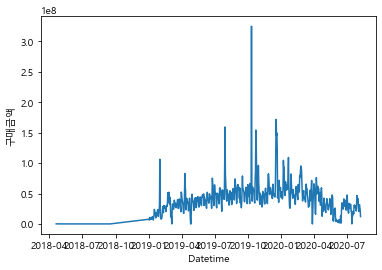

In [ ]:
sns.lineplot(data=p1, x="Datetime", y="구매금액")

In [ ]:
p2 = pd.pivot_table(data=df1,
                    index=["Datetime","물품대분류"], values="구매금액", aggfunc="sum").reset_index()

In [ ]:
p2

,Datetime,물품대분류,구매금액
0,2018-04-20,기저귀,57120
1,2018-04-20,더블하트,43800
2,2018-05-06,더블하트,26500
3,2018-05-14,FC,20600
4,2018-08-12,더블하트,75700
...,...,...,...
5241,2020-08-07,기타,182400
5242,2020-08-07,더블하트,408480
5243,2020-08-07,물티슈,100300
5244,2020-08-07,체험팩,112050


<AxesSubplot:xlabel='Datetime', ylabel='구매금액'>

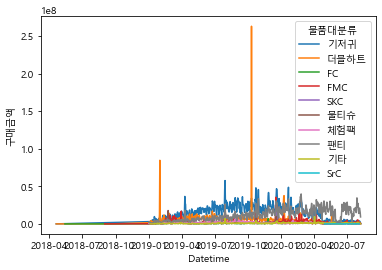

In [ ]:
sns.lineplot(data=p2, x="Datetime", y="구매금액", hue="물품대분류")

* 더블하트라는 물품이 제일 많이 팔린 것 을 볼 수 있습니다. (유아용품에 대한 Data)
* White_noise 를 생각하며 data를 분석해봅니다.
* 더블하트제툼을 볼때 판매량이 많은 것 을 감안하여, 어떤이벤트가 있었거나 물품대란이 있었을 수 도있다는 가정을 해보자.
* 시계열 분석을 할때에는 시각화를 하여, 확인을 해보는게 낫다.


In [ ]:
# 기저귀 data 만 따로 뽑아 분석
# 2018년에는 1개에 data 만 존재하고 2019부터 data가 존재하므로 빼는 것 이 낫다는 결론.
cond1 = (df1["물품대분류"] == "기저귀")
df1.loc[cond1]

,구매일,구매금액,물품대분류,Datetime,year,month,week,day_of_week
0,2018-04-20,57120,기저귀,2018-04-20,2018,4,16,Friday
29,2019-05-13,59520,기저귀,2019-05-13,2019,5,20,Monday
30,2019-05-10,50640,기저귀,2019-05-10,2019,5,19,Friday
31,2019-06-06,50640,기저귀,2019-06-06,2019,6,23,Thursday
32,2019-07-01,50640,기저귀,2019-07-01,2019,7,27,Monday
...,...,...,...,...,...,...,...,...
803578,2020-06-25,43400,기저귀,2020-06-25,2020,6,26,Thursday
803602,2020-06-26,43400,기저귀,2020-06-26,2020,6,26,Friday
803610,2020-06-28,49900,기저귀,2020-06-28,2020,6,26,Sunday
803631,2020-07-09,49900,기저귀,2020-07-09,2020,7,28,Thursday


In [ ]:
df2 = df1.loc[cond1].iloc[1:]
df2.head()

,구매일,구매금액,물품대분류,Datetime,year,month,week,day_of_week
29,2019-05-13,59520,기저귀,2019-05-13,2019,5,20,Monday
30,2019-05-10,50640,기저귀,2019-05-10,2019,5,19,Friday
31,2019-06-06,50640,기저귀,2019-06-06,2019,6,23,Thursday
32,2019-07-01,50640,기저귀,2019-07-01,2019,7,27,Monday
33,2019-07-29,101280,기저귀,2019-07-29,2019,7,31,Monday


# ** ARIMA (Auto Regressive Inegrated Moving Average)** 

 * ARIMA 사용 시기 및 조건
    - 단기예측에 적합
    - 계절적 변동요인 (주기적 변동요인)
    - 표본의 크기가 최소 50개 이상 
    - 정상적(Stationary)자료에 적용 가능 
        - 평균이 증가/감소 -> 차분(Difference)을 실시
        - 분산이 증가/감소 -> Lag 변환

## 3가지가 조합된 모델

### * AR(Auto Regressive Model) : 자기회귀모델    - ex)주식 - 어제마감했던금액이 다음날의 영향을주는 것


    - P 시점 전의 자료가 현재 시점의 데이터에 영향을 주는 자기회귀모델
    - 자기상관함수 (ACF : Auto Correlation Function) 
        - p 구간 내 데이터 사이의 상관관계 (교회 - 범죄 - [인구])
    - 부분자기상관함수 (PACF : Partial Auto Correlation Function) : 
        - 다른 시점의 데이터들의 영향을 제외한 두 관측치 사이의 상관관계 (교회 

    - 범죄 !- [인구])  
    - 일반적인 AR 모델에서는 ACF는 일정히 감소 / PACF가 절단면을 갖는다 
    - ACF와 PACF를 확인하여 분석 모델을 선택한다 
    
    
### * MA(Moving Average Model) : 이동평균모델 - 특정데이터의 평균을 계산


    - 일정한 p구간의 데이터들의 평균을 계산하여, 미래를 예측하는 방법 
    - 시계열의 불규칙적인 변동을 제거하기 위함 

### * Difference(차분) : 정상적으로 변환해주는 작업
     - 정상성(Stationary)을 만족하지 못하는 시계열 데이터를 정상성이 만족하는 데이   터로 변환 
     - AR만 사용하면 변동자료들의 설명이 떨어짐 그래서 MA(이동평균모델)을 같이 사용해 줍니다.
#### AR, MA 모델에 차분까지 집어넣은 모델이 Arima-Model 이다.

** ARIMA Model** (사용하기 위한 조건)

- 단기예측에 적합
- 계절적 변동요인 (주기적 변동)
- sample수가 많아야함. 기본적으로 Sample > 50
- 정성적자료(나열했을때 일정한 trend를 갖는)
    -> 차분

In [ ]:
# ARIMA_model 을 쓸떄 사용하는 모듈
import statsmodels.tsa.api as tsa

In [ ]:
df2.head()

,구매일,구매금액,물품대분류,Datetime,year,month,week,day_of_week
29,2019-05-13,59520,기저귀,2019-05-13,2019,5,20,Monday
30,2019-05-10,50640,기저귀,2019-05-10,2019,5,19,Friday
31,2019-06-06,50640,기저귀,2019-06-06,2019,6,23,Thursday
32,2019-07-01,50640,기저귀,2019-07-01,2019,7,27,Monday
33,2019-07-29,101280,기저귀,2019-07-29,2019,7,31,Monday


In [ ]:
df_time = pd.pivot_table(data=df2, index="Datetime",
                         values="구매금액", aggfunc="sum")
df_time.head()

,구매금액
Datetime,
2019-01-01,3051240
2019-01-02,2556280
2019-01-03,2729480
2019-01-04,2238440
2019-01-05,2478680


### 예를 들어서 밑에 방법으로도 사용 가능
- set_index를 사용하여

In [ ]:
# df_time = pd.pivot_table(data=df2, index="Datetime",
#                          values="구매금액", aggfunc="sum").reset_index()
# df_time.head().set_index("Datetime")

In [ ]:
# # 일주일 단위로 평균 금액을 계산해줌
# EX) 1Y, 1M, 1W, 1D
# y = df_time["구매금액"].resample("1W").mean()
# y

In [ ]:
y = df_time["구매금액"].resample("1D").mean()
y

Datetime
2019-01-01    3051240.0
2019-01-02    2556280.0
2019-01-03    2729480.0
2019-01-04    2238440.0
2019-01-05    2478680.0
                ...    
2020-08-03    3075900.0
2020-08-04    4010200.0
2020-08-05    2937800.0
2020-08-06    2647000.0
2020-08-07    1022300.0
Freq: D, Name: 구매금액, Length: 585, dtype: float64

In [ ]:
y.isnull().sum() # 결측치가 있으면 , model이 돌아가질 않기 떄문에 결측치 확인 해 줍니다.

7

### #결측치를 채우기 위한 것중, 그나마 괜찮은방법이 .fillna(method="bfill") 사용

이전자료를 대처값으로 채워줌(여기선 전날 data로 채워 줌)

- bfill 은 이전데이터를 결측치에 채워줌.(Backward)
- ffill 은 다음데이터를 결측치에 채워줌.(Forward)

In [ ]:
# Missing 값이 있는 경우에
y1  = y.fillna( method="ffill")
y1.isnull().sum()

0

## *시계열 모델 생성과 모델 시각화

- 주단위로 했을 때, 데이터 수가 50개 채 되지않아, tsa.seasonal_decompose에 적합하지 않기 때문에 일단위평균값으로 맟춤

* 분해 시계열
    - 시계열에 영향을 주는 일반적 요인을 시계열에서 분리해 분석하는 방법 
    - 계절요인 Seasonal
    - 추세요인 Trend 
    - 순환요인 Cyclical 
    - 불규칙요인 Irregular

In [ ]:
from pylab import rcParams

rcParams["figure.figsize"]= 13,10 #그래프의 SIZE를 조정해주는 함수

# #차트 기본 크기 설정
# mpl.rcParams['axes.labelsize'] = 14
# mpl.rcParams['xtick.labelsize'] = 12
# mpl.rcParams['ytick.labelsize'] = 12
# mpl.rcParams['text.color'] = 'k'

C:\Users\qazxc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\qazxc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


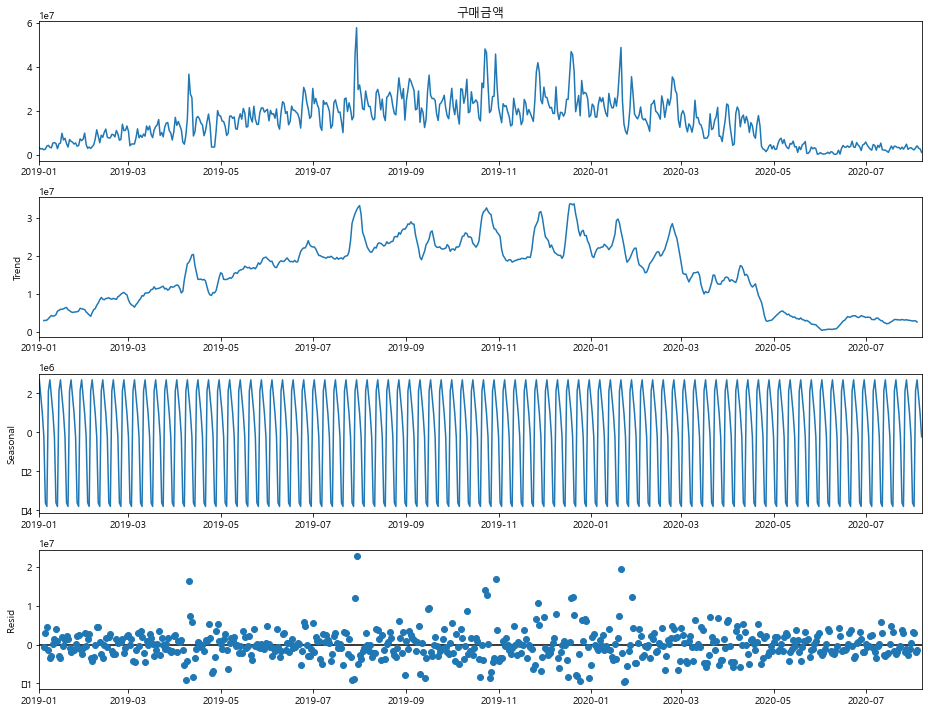

In [ ]:
#시계열 모델 생성

model_series = tsa.seasonal_decompose(y1, model="additive")

#모델 시각화
fig = model_series.plot()
plt.show()

In [ ]:
import itertools # 반복수를 만드는 라이브러리 

In [ ]:
p = d  = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2] , 12) for x in list(itertools.product(p, d, q))]

In [ ]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [ ]:
param_list = []
param_seasonal_list = []
results_AIC_list = []

In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = tsa.statespace.SARIMAX(y1, order=param,
                                        seasonal_order= param_seasonal,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)
            results = mod.fit()
            param_list.append(param)
            param_seasonal_list.append(param_seasonal)
            results_AIC_list.append(results.aic)
        except:
            continue

In [ ]:
ARIMA_list = pd.DataFrame({'Parameter':param_list,'Seasonal':param_seasonal_list,'AIC':results_AIC_list})
ARIMA_list.to_excel('arima_model_list.xlsx')

- **Likelihood (최대우도) : 특정 데이터가 모수로부터 추출되었을 가능도**
    - 특정 값에 대한 분포의 확률 추정 (연속 확률 밀도 함수 pdf의 y값) 
    
    
- **AIC (Akaike Information Criterion) : 데이터에 대한 모델의 상대적 품질**
    - AIC = -2 ln(L) + 2k 
    - 값이 낮을 수록 모형 적합도가 높은것을 의미 
    
    
- **BIC (Bayes Information Criterion)**
    - BIC = -2 ln(L) + log(n)p 
    - 변수가 더 많은 경우,  AIC에 더 많은 패널티를 부여해 계산 
    
    
- **HQIC (Hannan Quinn Information Criterion)**
    - HQIC = -2 ln(L) + 2k ln(ln(n))

In [ ]:
mod = tsa.statespace.SARIMAX(y1,order=(0, 1, 1),seasonal_order=(0, 1, 1, 12),
                              enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               구매금액   No. Observations:                  585
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -9521.297
Date:                            Wed, 22 Sep 2021   AIC                          19048.594
Time:                                    14:34:08   BIC                          19061.567
Sample:                                01-01-2019   HQIC                         19053.660
                                     - 08-07-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0721      0.063     -1.137      0.256      -0.196       0.052
ma.S.L12      -0.9948      0.022   

### Order (p,d,q), Seasonal Order (P,D,Q,M)

- p : AR에서의 p값 (p 구간 내 데이터 사이의 상관관계)
- d : 차분
- q : q MA PACF 편상관계수 q 값
- P
- D
- Q
- M
- Ljung - Box Test : 일정 기간동안 관측치가 랜덤이고, 독립적인지 여부를 검정

- 귀무 : 데이터가 상관관계를 나타내지 않는다.
- 대립 : 데이터가 상관관계를 나타낸다.
- P.value(귀무가설이 참일 확률) < 0.05 (유의수준) -> 대립가설 참
- Jarque Bera Test : 왜도와 첨도가 정규분포와 일치하는지 가설검정

- SARIMAX : 잔차의 분포가 정규분포 인가
- 귀무 가설 : 해당 잔차(residual)는 정규분포와 일치한다.
- 대립 가설 : 해당 잔차(residual)는 정규분포와 일치하지 않는다.
- P.value < 0.05 , 해당 잔차(residual)는 정규분포와 일치하지 않는다.

C:\Users\qazxc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\qazxc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


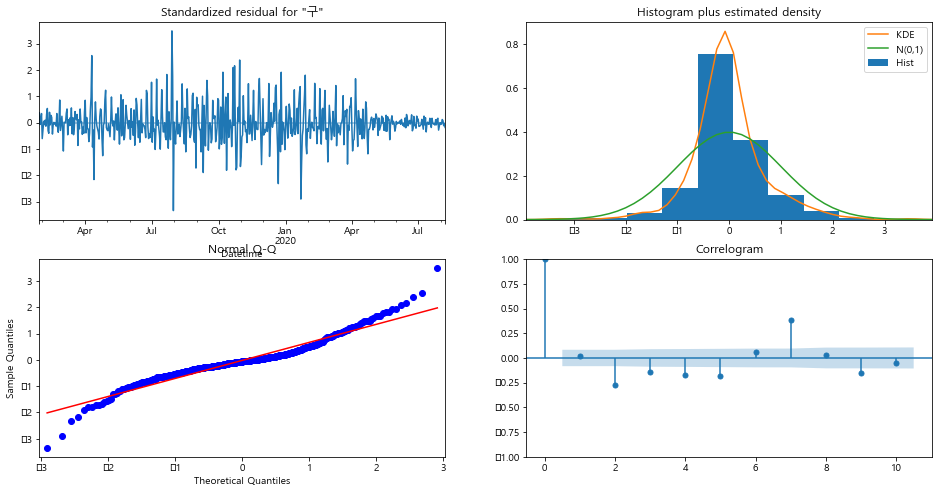

In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [ ]:
results.get_prediction()